<a href="https://colab.research.google.com/github/Ichraf-MOUELHI/Vente-de-vin-en-ligne/blob/main/Boutique_de_vin_en_ligne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimisez la gestion des données d'une boutique en ligne de bouteilles de vin**
METHODOLOGIE



 ETAPE 1

Rapprocher deux exports : un export de l’ERP contenant les
références produit, leur prix de vente et leur état de stock, et un export d’une table de l’outil de CMS contenant les informations des produits commercialisés en ligne (nom, description, nombre de ventes...).

 ETAPE 2

 Le tableau Excel qui permet d’établir le lien entre la référence du produit dans l’ERP (product_id) et la référence du même produit dans la base de la boutique en ligne (SKU).
 - Avoir le chiffre d’affaires par produit
 - Total du chiffre d’affaires réalisé en ligne.

ETAPE 3

 Analyse et détecter d’éventuelles valeurs aberrantes, et les lister puis faire une représentation graphique pour plus de lisibilité.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns



# 1. Préparation des données

* Importation des données
* Vérification de l'importation
* Nettoyage des variables inutiles
* Identification du type des données
* Identification des données en doubles ou manquantes.


# **Importation des données**

In [2]:
# URL vers les fichiers CSV hébergés sur GitHub
url_data_erp = 'https://raw.githubusercontent.com/Ichraf-MOUELHI/Vente-de-vin-en-ligne/refs/heads/main/Fichier_erp.csv'
url_data_web = 'https://raw.githubusercontent.com/Ichraf-MOUELHI/Vente-de-vin-en-ligne/refs/heads/main/Fichier_web.csv'
url_data_liaison = 'https://raw.githubusercontent.com/Ichraf-MOUELHI/Vente-de-vin-en-ligne/refs/heads/main/fichier_liaison.csv'


# Chargement des fichiers directement depuis GitHub
data_erp = pd.read_csv(url_data_erp)
data_web = pd.read_csv(url_data_web)
data_liaison = pd.read_csv(url_data_liaison)


# EXPLORATION DU FICHIER ERP

In [3]:
data_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,"24,2",0,outofstock
1,3849,1,"34,3",0,outofstock
2,3850,1,"20,8",0,outofstock
3,4032,1,"14,1",0,outofstock
4,4039,1,46,0,outofstock


In [4]:
data_erp.shape

(825, 5)

In [5]:
# Test des valeurs manquantes
data_erp.isna().sum()

,0
product_id,0
onsale_web,0
price,0
stock_quantity,0
stock_status,0


In [6]:
data_erp.isnull().sum()

,0
product_id,0
onsale_web,0
price,0
stock_quantity,0
stock_status,0


In [7]:
# Vérification des doublons sur la clé primaire 'product_id'
doublons_verif = data_erp.duplicated(subset=['product_id']).sum()

print(f'Il y a {doublons_verif} doublons dans product_id.')

del doublons_verif

Il y a 0 doublons dans product_id.


In [8]:
data_erp.nunique()

,0
product_id,825
onsale_web,2
price,382
stock_quantity,129
stock_status,2


In [9]:
data_erp.dtypes

,0
product_id,int64
onsale_web,int64
price,object
stock_quantity,int64
stock_status,object


"product_id" est une valeure qualitative, on va la convertir en objet.

"onsale_web" est une valeur booléenne qui prend soit 0 ou 1.

In [10]:
# Vérification si "onsale_web" contient des valeurs booléennes

verif_onsale_web = data_erp['onsale_web'].isin([0, 1]).all()

print(f'La variable \"onsale_web\" ne contient que des valeurs 0 ou 1 : {verif_onsale_web}.')

del verif_onsale_web

La variable "onsale_web" ne contient que des valeurs 0 ou 1 : True.


In [11]:
data_erp.isna().sum()

,0
product_id,0
onsale_web,0
price,0
stock_quantity,0
stock_status,0


In [12]:
# Conversion des variables "product_id" en object et "onsale_web" en bool
data_erp['product_id'] = data_erp['product_id'].astype(object)
data_erp['onsale_web'] = data_erp['onsale_web'].astype(bool)

# Vérifiez d'abord si les colonnes contiennent des chaînes de caractères avant de les traiter
if data_erp['price'].dtype == 'object':
    data_erp['price'] = pd.to_numeric(data_erp['price'].str.replace(',', '.'), errors='coerce')

if data_erp['stock_quantity'].dtype == 'object':
    data_erp['stock_quantity'] = pd.to_numeric(data_erp['stock_quantity'].str.replace(',', '.'), errors='coerce')

In [13]:
data_erp.isna().sum()

,0
product_id,0
onsale_web,0
price,0
stock_quantity,0
stock_status,0


In [14]:
data_erp.dtypes

,0
product_id,object
onsale_web,bool
price,float64
stock_quantity,int64
stock_status,object


In [15]:
data_erp.describe()

,price,stock_quantity
count,825.000000,825.000000
mean,32.384000,26.583030
std,26.832271,45.875948
min,-8.000000,-1.000000
25%,14.600000,1.000000
50%,24.400000,11.000000
75%,42.000000,34.000000
max,225.000000,578.000000


# RECHERCHE DE PRODUITS QUI SONT EN STOCK MAIS AVEC UNE QUANTITE 0.
# RECHERCHE DE PRODUITS OUTOFSTOCK ALORS QUE LA QUANTITE EN STOCK EST SUPERIEUR A 0.

In [16]:
# Sélectionner les lignes où la quantité est supérieure à 0 et le statut est 'outofstock'
count_outofstock= len(data_erp.loc[(data_erp['stock_quantity'] > 0) & (data_erp['stock_status'] == 'outofstock')])

# Afficher le nombre de lignes correspondantes
print("Nombre de lignes avec quantité supérieure à 0 mais statut 'outofstock' :", count_outofstock)

Nombre de lignes avec quantité supérieure à 0 mais statut 'outofstock' : 5


In [17]:
outofstock_control = data_erp[(data_erp['stock_status'] == 'outofstock') & (data_erp['stock_quantity'] > 0)]
outofstock_control

,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,False,86.1,1,outofstock
49,4090,False,73.0,6,outofstock
50,4092,False,47.0,6,outofstock
630,5826,True,41.2,12,outofstock
696,6125,False,14.2,48,outofstock


In [18]:
# Vérifier les statuts 'instock' avec des quantités supérieures à 0
instock_control = data_erp[(data_erp['stock_status'] == 'instock') & (data_erp['stock_quantity'] <= 0)]
instock_control

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,True,25.0,0,instock


In [19]:
# Sélectionner les lignes où la quantité est inférieure ou égale à 0 et le statut est 'instock'
count_instock= len(data_erp.loc[(data_erp['stock_quantity'] <= 0) & (data_erp['stock_status'] == 'instock')])

# Afficher le nombre de lignes correspondantes
print("Nombre de lignes avec quantité inférieur ou égale à 0 mais statut 'instock' :", count_instock)

Nombre de lignes avec quantité inférieur ou égale à 0 mais statut 'instock' : 1


In [20]:
# Mettre à jour les statuts des stock pour les produits filtrés
data_erp.loc[data_erp['stock_quantity'] <= 0, 'stock_status'] = 'outofstock'
data_erp.loc[(data_erp['stock_quantity'] > 0) & (data_erp['stock_status'] == 'outofstock'), 'stock_status'] = 'instock'

print("DataFrame mis à jour :")
print(data_erp)

DataFrame mis à jour :
    product_id  onsale_web  price  stock_quantity stock_status
0         3847        True   24.2               0   outofstock
1         3849        True   34.3               0   outofstock
2         3850        True   20.8               0   outofstock
3         4032        True   14.1               0   outofstock
4         4039        True   46.0               0   outofstock
..         ...         ...    ...             ...          ...
820       7203       False   45.0              30      instock
821       7204       False   45.0               9      instock
822       7247        True   54.8              23      instock
823       7329       False   26.5              14      instock
824       7338        True   16.3              45      instock

[825 rows x 5 columns]


MISE A JOUR DES STATUTS DU STOCK

In [21]:
# Sélectionner les lignes où la quantité est supérieure à 0 et le statut est 'outofstock'
count_outofstock= len(data_erp.loc[(data_erp['stock_quantity'] > 0) & (data_erp['stock_status'] == 'outofstock')])

# Afficher le nombre de lignes correspondantes
print("Nombre de lignes avec quantité supérieure à 0 mais statut 'outofstock' :", count_outofstock)

Nombre de lignes avec quantité supérieure à 0 mais statut 'outofstock' : 0


In [22]:
# Sélectionner les lignes où la quantité est inférieure ou égale à 0 et le statut est 'instock'
count_instock= len(data_erp.loc[(data_erp['stock_quantity'] <= 0) & (data_erp['stock_status'] == 'instock')])

# Afficher le nombre de lignes correspondantes
print("Nombre de lignes avec quantité inférieur ou égale à 0 mais statut 'instock' :", count_instock)

Nombre de lignes avec quantité inférieur ou égale à 0 mais statut 'instock' : 0


In [23]:
outofstock_control = data_erp[(data_erp['stock_status'] == 'outofstock') & (data_erp['stock_quantity'] > 0)]
outofstock_control

,product_id,onsale_web,price,stock_quantity,stock_status


In [24]:
# Vérifier les statuts 'instock' avec des quantités supérieures à 0
instock_control = data_erp[(data_erp['stock_status'] == 'instock') & (data_erp['stock_quantity'] <= 0)]
instock_control

,product_id,onsale_web,price,stock_quantity,stock_status


# LA MISE A JOUR DES STATUS EST BIEN VERIFIEE

# **RECHERCHE DE PRIX NEGATIFS**

In [25]:
# Utilisez la méthode boolean indexing pour filtrer les valeurs négatives sur la colonne price
prix_negatif = data_erp[data_erp['price'] < 0]

# Affichez les valeurs négatives
prix_negatif

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,False,-8.0,0,outofstock
739,6594,False,-1.0,192,instock


# On voit bien qu'il existe deux produits avec des prix négatifs ! On va donc faire une imputation (ici on a choisi imputation par la médiane : La médiane est moins sensible aux valeurs extrêmes que la moyenne). On va remplacez les valeurs par la médiane des valeurs non manquantes ou positives dans la même colonne.

In [26]:
# Utilisez la méthode boolean indexing pour filtrer les valeurs négatives sur la colonne price
positif_prix = data_erp.loc[data_erp['price'] > 0, 'price']
# Calculer la médiane des prix positifs
median_positif_prix = positif_prix.median()
median_positif_prix

24.4

In [27]:
# Remplacer les valeurs négatives par la médiane des prix positifs en utilisant la méthode apply
data_erp['price'] = data_erp['price'].apply(lambda x: median_positif_prix if x < 0 else x)

# Vérifier si les deux lignes avec les identifiants du product_id ont changé
# Use pd.concat instead of append
lignes_modifiee = pd.concat([data_erp[data_erp['product_id'] == 5017], data_erp[data_erp['product_id'] == 6594]])
# Resultats
lignes_modifiee

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,False,24.4,0,outofstock
739,6594,False,24.4,192,instock


# On voit bien que les prix négatifs on été remplacé par la médiane positive.

In [28]:
data_erp.isna().sum()

,0
product_id,0
onsale_web,0
price,0
stock_quantity,0
stock_status,0


In [29]:
data_erp.isnull().sum()

,0
product_id,0
onsale_web,0
price,0
stock_quantity,0
stock_status,0


In [30]:
# Compter le nombre de produits mise en ligne
count_onsaleweb = len(data_erp.loc[(data_erp['onsale_web'] == True)])

# Afficher le nombre de lignes correspondantes
print("Nombre de produits mis en ligne est : ", count_onsaleweb)

Nombre de produits mis en ligne est :  717


# Le nombre de bouteilles qui sont en vente en ligne est de 717

In [31]:
data_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,True,24.2,0,outofstock
1,3849,True,34.3,0,outofstock
2,3850,True,20.8,0,outofstock
3,4032,True,14.1,0,outofstock
4,4039,True,46.0,0,outofstock


In [32]:
data_erp.shape

(825, 5)

# EXPLORATION DU FICHIER data_web

In [33]:
data_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [34]:
data_web.shape

(1513, 28)

Les données du data_web contiennent 1513 produits avec 28 variables:
* Le nombre de produits disponibles en ligne est largement supérieur au nombre de produits dans le data_erp (717 produits).
* Beacoup de colonnes semblent vides ou comportent des valeurs manquantes

In [35]:
data_web.dtypes

,0
sku,object
virtual,int64
downloadable,int64
rating_count,int64
average_rating,float64
total_sales,float64
tax_status,object
tax_class,float64
post_author,float64
post_date,object


In [36]:
data_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,3.855245,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,7.702346,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


Le résultat du tableau nous confirme que la majorité des colonnes sont vides et donc visiblement inutiles

In [37]:
# Suppression des colonnes dont toutes les lignes sont égales à 0
data_web = data_web.drop(data_web.loc[:, (data_web == 0).all(axis='rows')], axis='columns')

# Suppression colonnes dont toutes les lignes sont vides NaN
data_web = data_web.dropna(axis='columns', how='all')

data_web.shape

(1513, 21)

# 7 Colonnes ont été supprimées

In [38]:
data_web.describe()

,average_rating,total_sales,post_author,post_parent,menu_order,comment_count
count,1430.0,1430.000000,1430.000000,1430.0,1430.0,1430.0
mean,0.0,3.855245,1.998601,0.0,0.0,0.0
std,0.0,7.702346,0.037385,0.0,0.0,0.0
min,0.0,0.000000,1.000000,0.0,0.0,0.0
25%,0.0,0.000000,2.000000,0.0,0.0,0.0
50%,0.0,1.000000,2.000000,0.0,0.0,0.0
75%,0.0,4.000000,2.000000,0.0,0.0,0.0
max,0.0,96.000000,2.000000,0.0,0.0,0.0


Les 4 colonnes "average_rating" , "post_parent", "menu_order", "comment_count" comportent 1430 fois la valeur 0.

Ceci donne la raison pour laquelle les valeurs restantes sont manquantes et donc elles n'ont pas été supprimées.


In [39]:
# Vérification en affichant le nombre de fois où chaque valeur est présente.Comptage des 4 colonnes
data_web[['average_rating', 'post_parent', 'menu_order', 'comment_count']].value_counts(dropna=False)

,,,,count
average_rating,post_parent,menu_order,comment_count,
0.0,0.0,0.0,0.0,1430
NaN,NaN,NaN,NaN,83


La vérification montre qu'on a 1430 valeurs 0 et 83 valeurs NaN ce qui donne le feu vert pour supprimer ces colonnes

In [40]:
# Suppression des 4 colonnes inutiles
data_web = data_web.drop(['average_rating', 'post_parent', 'menu_order', 'comment_count'], axis='columns')

data_web.dtypes

,0
sku,object
total_sales,float64
tax_status,object
post_author,float64
post_date,object
post_date_gmt,object
post_title,object
post_excerpt,object
post_status,object
comment_status,object


In [41]:
data_web

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,16004,5.0,NaN,2.0,2018-06-07 16:27:25,2018-06-07 14:27:25,Château du Couvent Pomerol 2017,NaN,publish,closed,closed,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,3.0,taxable,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,16209,6.0,taxable,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,15763,1.0,NaN,2.0,2020-01-25 14:08:16,2020-01-25 13:08:16,Domaine de la Monardière Vacqueyras Vieilles V...,NaN,publish,closed,closed,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,2.0,NaN,2.0,2019-03-28 15:25:14,2019-03-28 14:25:14,Domaine de Montbourgeau L'Etoile Vin Jaune 2009,NaN,publish,closed,closed,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1509,15663,3.0,taxable,2.0,2018-02-27 10:27:01,2018-02-27 09:27:01,Chermette Domaine du Vissoux Brouilly Pierreux...,Le Brouilly est le plus méridional des crus du...,publish,closed,closed,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1510,15910,0.0,taxable,2.0,2019-03-28 10:59:43,2019-03-28 09:59:43,Thevenet Quintaine Viré-Clessé La Bongran 2015,C’est dans cette cuvée la pleine expression du...,publish,closed,closed,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1511,38,38.0,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,NaN,publish,closed,closed,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg


In [42]:
data_web.isnull().sum()

,0
sku,85
total_sales,83
tax_status,797
post_author,83
post_date,83
post_date_gmt,83
post_title,83
post_excerpt,797
post_status,83
comment_status,83


In [43]:
# Vérification des lignes contenants des NaN
data_web.isna().sum()

,0
sku,85
total_sales,83
tax_status,797
post_author,83
post_date,83
post_date_gmt,83
post_title,83
post_excerpt,797
post_status,83
comment_status,83


83 lignes sont vides , et 85 pour la colonnes sku/product_id

In [44]:
# Identification des 2 lignes sans sku
# Filtrage des données en fonction de deux conditions :
#    La colonne 'sku' doit être NaN (c'est-à-dire qu'elle ne contient pas de valeur).
#    La colonne 'total_sales' ne doit pas être NaN (c'est-à-dire qu'elle doit contenir une valeur).
# Le symbole "~" inverse la condition, de sorte que la série de valeurs booléennes résultante sera True si la colonne 'total_sales' est NaN, sinon False.
sku_sans_id = data_web.loc[data_web['sku'].isna() & ~data_web['total_sales'].isna()]
sku_sans_id

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
353,NaN,3.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
488,NaN,10.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


La variable "post_title" va nous aider à chercher si ces produits existent ailleurs dans notre jeu de données et si nous pourrions donc en déduire leur SKU.

In [45]:
sku_nan = data_web.loc[(data_web['post_title'].str.contains('^pierre.jean.villa.*fongeant.*2017', case=False)) |
           (data_web['post_title'].str.contains('^pierre.jean.villa.*condrieu.*2018', case=False)),
           ['sku', 'post_title']]

sku_nan

,sku,post_title
353,NaN,Pierre Jean Villa Condrieu Jardin Suspendu 2018
488,NaN,Pierre Jean Villa Côte Rôtie Fongeant 2017


Il n'y a pas d'autres résultats.
On va essayer de créer des sku pour ces deux produits.

In [46]:
replace_nan = data_web['sku']
replace_nan

,sku
0,16004
1,NaN
2,15075
3,16209
4,15763
...,...
1508,12881
1509,15663
1510,15910
1511,38


In [47]:

sku_replace_nan = pd.DataFrame(replace_nan)

# Étape 1 : Recherchez les identifiants NaN
id_nan = sku_replace_nan['sku'].isna()

# Étape 2 : Remplacez les valeurs NaN par des identifiants numériques uniques
unique_identifiers = np.arange(1000, 1000 + id_nan.sum())
sku_replace_nan.loc[id_nan, 'sku'] = unique_identifiers

sku_replace_nan

,sku
0,16004
1,1000
2,15075
3,16209
4,15763
...,...
1508,12881
1509,15663
1510,15910
1511,38


In [48]:
print("Avant la modification :")
data_web.loc[[353, 488]]

Avant la modification :


,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
353,NaN,3.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
488,NaN,10.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


In [49]:
# Remplacez la colonne "sku" du data_web par la colonne "sku" du dataframe sku_replace_nan
data_web['sku'] = sku_replace_nan['sku']

data_web.isna().sum()

,0
sku,0
total_sales,83
tax_status,797
post_author,83
post_date,83
post_date_gmt,83
post_title,83
post_excerpt,797
post_status,83
comment_status,83


In [50]:
print("Après la modification :")
data_web.loc[[353, 488]]

Après la modification :


,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
353,1017,3.0,taxable,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",publish,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
488,1026,10.0,taxable,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",publish,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,https://www.bottle-neck.fr/?post_type=product&...,product,NaN


# **RECHERCHE DE DOUBLONS **

In [51]:
# Vérification des lignes contenants des NaN
data_web.isna().sum()

,0
sku,0
total_sales,83
tax_status,797
post_author,83
post_date,83
post_date_gmt,83
post_title,83
post_excerpt,797
post_status,83
comment_status,83


In [52]:
# Nombre de doublons pour la colonne sku
doublons_sku = data_web['sku'].duplicated().sum()
doublons_sku

np.int64(714)

In [53]:
data_web.shape

(1513, 17)

In [54]:
data_web.nunique()

,0
sku,799
total_sales,41
tax_status,1
post_author,2
post_date,716
post_date_gmt,716
post_title,713
post_excerpt,679
post_status,1
comment_status,1


Les données du data_web contiennent 1513 produits sauf que 799 d'entre eux correspondent à des doublons !

**Hypothèse :

**Chaque ligne produit est doublée. Il a surement une différence notable entre une ligne et son doublon qui nous permettra de supprimer les lignes inutiles. Pour cela, nous allons choisir une ligne aléatoirement, puis nous allons chercher son doublon et enfin  afficher les deux lignes.

In [55]:
# Suppression des doublons de sku
data_web.drop_duplicates(subset=['sku'], inplace=True)

In [56]:
# Vérification de la suppression des doublons
doublons_apres = data_web['sku'][data_web['sku'].duplicated()]

if doublons_apres.empty:
    print("La colonne 'sku' ne contient plus de doublons.")
else:
    print("Vérifiez la logique de suppression des doublons.")

La colonne 'sku' ne contient plus de doublons.


In [57]:
# Vérification des doublons de la colonne sku
doublons_verif = data_web.duplicated(subset=['sku']).sum()

print(f'Il y a {doublons_verif} doublons dans sku.')

del doublons_verif

Il y a 0 doublons dans sku.


In [58]:
data_web

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type
0,16004,5.0,NaN,2.0,2018-06-07 16:27:25,2018-06-07 14:27:25,Château du Couvent Pomerol 2017,NaN,publish,closed,closed,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,3.0,taxable,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,Parés Baltà Penedès Indigena 2017,Des couleurs et aromes intenses où le fruit et...,publish,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
3,16209,6.0,taxable,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,Maurel Cabardès Tradition 2017,"Un joli nez aux arômes de fruits rouges, de ca...",publish,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
4,15763,1.0,NaN,2.0,2020-01-25 14:08:16,2020-01-25 13:08:16,Domaine de la Monardière Vacqueyras Vieilles V...,NaN,publish,closed,closed,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,16011,0.0,NaN,2.0,2018-09-01 15:50:44,2018-09-01 13:50:44,Nouvelle-Zélande Marlborough Momo Pinot Noir 2016,NaN,publish,closed,closed,nouvelle-zelande-marlborough-momo-pinot-noir-2016,2020-06-22 11:35:02,2020-06-22 09:35:02,https://www.bottle-neck.fr/wp-content/uploads/...,attachment,image/jpeg
1425,15180,1.0,taxable,2.0,2019-03-13 15:08:45,2019-03-13 14:08:45,Camille Giroud Santenay Rouge 2016,<div>Ce vin provient de vignes situées dans de...,publish,closed,closed,camille-giroud-santenay-rouge-2016,2020-08-20 10:25:02,2020-08-20 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN
1448,1082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1450,1083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data_web.nunique()

,0
sku,799
total_sales,39
tax_status,1
post_author,2
post_date,716
post_date_gmt,716
post_title,713
post_excerpt,362
post_status,1
comment_status,1


On constate bien que l'on peut encore faire un peu de nettoyage:
* suppression des variables n'ayant qu'une valeur ou n'ayant que des valeurs manquantes;
* suppression des variables non pertinentes pour la suite de l'analyse;
* suppression des dates au format GMT (en doublon).

Enfin, nous allons modifier l'affichage des dates restantes en ne conservant que l'année, le mois et le jour.

In [60]:
# On ne conserve que les variables ayant au moins 2 valeurs différentes
data_web = data_web.loc[:, (data_web.nunique() > 2)].copy()

# Suppression colonnes non pertinentes
data_web = data_web.drop(['post_date_gmt', 'post_name', 'post_excerpt', 'post_modified_gmt', 'guid'], axis='columns')

# Modification format dates
data_web['post_date'] = pd.to_datetime(data_web['post_date'], errors='coerce')
data_web['post_modified'] = pd.to_datetime(data_web['post_modified'], errors='coerce')
data_web['post_date'] = data_web['post_date'].dt.normalize()
data_web['post_modified'] = data_web['post_modified'].dt.normalize()



In [61]:
# Vérifier le NaN
# Pour la colonne total_sales
count_nan_in_total_sale = data_web['total_sales'].isnull().sum()
print("Nombre de NaN dans la colonne total_sale :", count_nan_in_total_sale)


# Pour vérifier la colonne post_date
count_nan_in_post_date = data_web['post_date'].isnull().sum()
print("Nombre de NaN dans la colonne post_date :", count_nan_in_total_sale)


# Pour vérifier la colonne post_title
count_nan_in_post_date = data_web['post_title'].isnull().sum()
print("Nombre de NaN dans la colonne post_title :", count_nan_in_total_sale)

# Pour vérifier la colonne post_modified
count_nan_in_post_date = data_web['post_modified'].isnull().sum()
print("Nombre de NaN dans la colonne post_modified :", count_nan_in_total_sale)

Nombre de NaN dans la colonne total_sale : 83
Nombre de NaN dans la colonne post_date : 83
Nombre de NaN dans la colonne post_title : 83
Nombre de NaN dans la colonne post_modified : 83


In [62]:
# SUPRESSION DES 83 LIGNES NAN
# data_web = data_web.dropna(subset=['total_sales', 'post_date', 'post_title', 'post_modified'])

In [63]:
data_web

,sku,total_sales,post_date,post_title,post_modified
0,16004,5.0,2018-06-07,Château du Couvent Pomerol 2017,2020-08-25
1,1000,NaN,NaT,NaN,NaT
2,15075,3.0,2018-02-14,Parés Baltà Penedès Indigena 2017,2020-08-20
3,16209,6.0,2018-02-14,Maurel Cabardès Tradition 2017,2020-08-05
4,15763,1.0,2020-01-25,Domaine de la Monardière Vacqueyras Vieilles V...,2020-08-21
...,...,...,...,...,...
1422,16011,0.0,2018-09-01,Nouvelle-Zélande Marlborough Momo Pinot Noir 2016,2020-06-22
1425,15180,1.0,2019-03-13,Camille Giroud Santenay Rouge 2016,2020-08-20
1448,1082,NaN,NaT,NaN,NaT
1450,1083,NaN,NaT,NaN,NaT


In [64]:
# Vérifier si les colonnes 'post_date	' et 'post_modified' sont valides et au bon format
# Convertir la colonne "post_date et post_modified" en objet datetime
data_web['post_date'] = pd.to_datetime(data_web['post_date'], errors='coerce')

# Vérifiez s'il y a des valeurs NaN dans la colonne
dates_valides_post = not data_web['post_date'].isna().any()

# Affichez le résultat
if dates_valides_post:
    print("Toutes les dates de la colonne 'post_date' sont valides.")
else:
    print("Il y a des dates de la colonne 'post_date' invalides.")

Il y a des dates de la colonne 'post_date' invalides.


In [65]:
# Vérifier si les colonnes 'post_date	' et 'post_modified' sont valides et au bon format
# Convertir la colonne "post_modified" en objet datetime
data_web['post_modified'] = pd.to_datetime(data_web['post_modified'], errors='coerce')

# Vérifiez s'il y a des valeurs NaN dans la colonne
dates_valides_modified = not data_web['post_modified'].isna().any()

# Affichez le résultat
if dates_valides_modified:
    print("Toutes les dates de la colonne 'post_modified' sont valides.")
else:
    print("Il y a des dates de la colonne 'post_modified' invalides.")

Il y a des dates de la colonne 'post_modified' invalides.


# EXPLORATION FICHIER **DATA_LIAISON**

In [66]:
data_liaison.nunique()

,0
product_id,825
sku_id_web,734


In [67]:
data_liaison.describe()

,product_id
count,825.000000
mean,5162.597576
std,902.644635
min,3847.000000
25%,4348.000000
50%,4907.000000
75%,5805.000000
max,7338.000000


In [68]:
data_liaison.dtypes

,0
product_id,int64
sku_id_web,object


In [69]:
# Changer le type de la colonne product_id
data_liaison['product_id'] = data_liaison['product_id'].astype(object)

In [70]:
data_liaison.dtypes

,0
product_id,object
sku_id_web,object


In [71]:
data_liaison

,product_id,sku_id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [72]:
data_liaison.shape

(825, 2)

Les données du fichier de liaison contiennent également 825 produits et 2 variables:

* "product_id": le code du produit issu de l'ERP.
* "sku_id_web": le code du produit issu du WEB.

Nous savons que "sku_id_web" correspond au SKU du fichier data_web.

In [73]:
# Vérification des doublons de la colonne sku_id_web
doublons_verif = data_liaison.duplicated(subset=['sku_id_web']).sum()

print(f'Il y a {doublons_verif} doublons dans sku_id_web.')

del doublons_verif

Il y a 90 doublons dans sku_id_web.


In [74]:
# Vérification des doublons de la colonne product_id
doublons_verif = data_liaison.duplicated(subset=['product_id']).sum()

print(f'Il y a {doublons_verif} doublons dans product_id.')

del doublons_verif

Il y a 0 doublons dans product_id.


In [75]:
data_liaison.isna().sum()

,0
product_id,0
sku_id_web,91


In [76]:
# Utilisez la méthode `duplicated()` pour trouver les lignes en double
doublons_liaison = data_liaison[data_liaison.duplicated(subset=['sku_id_web'])]

# Affichez les lignes en double
print("Lignes en double :")
doublons_liaison

Lignes en double :


,product_id,sku_id_web
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
151,4233,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


LES DOUBLONS SONT DES NaN.
On va les laisser les doublons des sku_id_web,  ceci nous permettera de faire la fusion avec la totalité des product_id.

In [77]:
# SUPRESSION DES NAN DE sku_id_web
# data_liaison = data_liaison.dropna().reset_index(drop=True)
# data_liaison

In [78]:
data_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,True,24.2,0,outofstock
1,3849,True,34.3,0,outofstock
2,3850,True,20.8,0,outofstock
3,4032,True,14.1,0,outofstock
4,4039,True,46.0,0,outofstock
...,...,...,...,...,...
820,7203,False,45.0,30,instock
821,7204,False,45.0,9,instock
822,7247,True,54.8,23,instock
823,7329,False,26.5,14,instock


In [79]:
data_web

,sku,total_sales,post_date,post_title,post_modified
0,16004,5.0,2018-06-07,Château du Couvent Pomerol 2017,2020-08-25
1,1000,NaN,NaT,NaN,NaT
2,15075,3.0,2018-02-14,Parés Baltà Penedès Indigena 2017,2020-08-20
3,16209,6.0,2018-02-14,Maurel Cabardès Tradition 2017,2020-08-05
4,15763,1.0,2020-01-25,Domaine de la Monardière Vacqueyras Vieilles V...,2020-08-21
...,...,...,...,...,...
1422,16011,0.0,2018-09-01,Nouvelle-Zélande Marlborough Momo Pinot Noir 2016,2020-06-22
1425,15180,1.0,2019-03-13,Camille Giroud Santenay Rouge 2016,2020-08-20
1448,1082,NaN,NaT,NaN,NaT
1450,1083,NaN,NaT,NaN,NaT


In [80]:
data_liaison

,product_id,sku_id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


# FUSION DES DONNEES

ETAPES

* Création d'un DF data_fusion
* Fusion des données du data_erp avec data_liaison;
* Vérification et nettoyage;
* Création
* Fusion du DataFrame obtenu avec le fichier data_web;
* Vérification et nettoyage du jeu de données final.

In [81]:
data_erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,True,24.2,0,outofstock
1,3849,True,34.3,0,outofstock
2,3850,True,20.8,0,outofstock
3,4032,True,14.1,0,outofstock
4,4039,True,46.0,0,outofstock
...,...,...,...,...,...
820,7203,False,45.0,30,instock
821,7204,False,45.0,9,instock
822,7247,True,54.8,23,instock
823,7329,False,26.5,14,instock


In [82]:
data_liaison

,product_id,sku_id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [83]:
data_liaison = data_liaison.rename(columns = {'sku_id_web':'sku'})

In [84]:
# Jointure outer pour conserver toutes les lignes
data_fusion = pd.merge((data_erp), (data_liaison), on = ['product_id'], how = 'outer')
data_fusion.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,True,24.2,0,outofstock,15298
1,3849,True,34.3,0,outofstock,15296
2,3850,True,20.8,0,outofstock,15300


In [85]:
data_fusion.shape

(825, 6)

In [86]:
data_fusion

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,True,24.2,0,outofstock,15298
1,3849,True,34.3,0,outofstock,15296
2,3850,True,20.8,0,outofstock,15300
3,4032,True,14.1,0,outofstock,19814
4,4039,True,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,False,45.0,30,instock,NaN
821,7204,False,45.0,9,instock,NaN
822,7247,True,54.8,23,instock,13127-1
823,7329,False,26.5,14,instock,14680-1


In [87]:
data_fusion.isna().sum()

,0
product_id,0
onsale_web,0
price,0
stock_quantity,0
stock_status,0
sku,91


Il manque 91 valeurs dans "sku".
Avant de supprimer ces lignes affichons, grâce à "onsale_web", les produits que l'on aurait pu retrouver dans les ventes en ligne.

In [88]:
data_fusion.loc[(data_fusion['sku'].isna()) & (data_fusion['onsale_web'] == True)]

,product_id,onsale_web,price,stock_quantity,stock_status,sku
242,4594,True,144.0,0,outofstock,NaN
486,5070,True,84.7,0,outofstock,NaN
487,5075,True,43.3,0,outofstock,NaN


Il y a 3 produits concernés.

In [89]:
# Filtrer les lignes du data_fusion en ne conservant que celles où la valeur de la colonne 'sku' n'est pas NaN.
# créer une copie de data_fusion filtré pour éviter de modifier le DataFrame d'origine.
# Réinitialiser l'index du DF pour qu'il commence à partir de zéro et supprime l'ancien index.
# Cela peut être utile pour obtenir un index continu et propre dans le DataFrame résultant.
# data_fusion = data_fusion.loc[~data_fusion['sku'].isna()].copy().reset_index(drop=True)
# data_fusion

In [90]:
data_fusion.isna().sum()

,0
product_id,0
onsale_web,0
price,0
stock_quantity,0
stock_status,0
sku,91


In [91]:
data_fusion.shape

(825, 6)

La première fusion est desormais complétée.

Deuxième fusion :

In [92]:
data_web

,sku,total_sales,post_date,post_title,post_modified
0,16004,5.0,2018-06-07,Château du Couvent Pomerol 2017,2020-08-25
1,1000,NaN,NaT,NaN,NaT
2,15075,3.0,2018-02-14,Parés Baltà Penedès Indigena 2017,2020-08-20
3,16209,6.0,2018-02-14,Maurel Cabardès Tradition 2017,2020-08-05
4,15763,1.0,2020-01-25,Domaine de la Monardière Vacqueyras Vieilles V...,2020-08-21
...,...,...,...,...,...
1422,16011,0.0,2018-09-01,Nouvelle-Zélande Marlborough Momo Pinot Noir 2016,2020-06-22
1425,15180,1.0,2019-03-13,Camille Giroud Santenay Rouge 2016,2020-08-20
1448,1082,NaN,NaT,NaN,NaT
1450,1083,NaN,NaT,NaN,NaT


In [93]:
# Fusion outer pour conserver toutes les lignes
data_fusion = pd.merge((data_fusion), (data_web), on = ['sku'], how = 'outer')
data_fusion.head(3)

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_modified
0,NaN,NaN,NaN,NaN,NaN,1000,NaN,NaT,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,1001,NaN,NaT,NaN,NaT
2,NaN,NaN,NaN,NaN,NaN,1002,NaN,NaT,NaN,NaT


In [94]:
data_fusion.shape

(910, 10)

In [95]:
data_fusion.isna().sum()

,0
product_id,85
onsale_web,85
price,85
stock_quantity,85
stock_status,85
sku,91
total_sales,194
post_date,194
post_title,194
post_modified,194


# VERIFIONS SI LES PRODUITS DANS ERP QUI SONT Onsale_web = True SONT BIEN PRESENT DANS LA FUSION

In [96]:
# Filtrer les produits avec onsale_web = True et compter le nombre
filtered_onsale_true = data_fusion.loc[data_fusion['onsale_web'] == True]

# Affichez les lignes où la colonne D contient True
filtered_onsale_true

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_modified
85,5913,True,36.0,9.0,instock,10014,0.0,2019-04-04,Darnley's London Dry Gin Original,2020-08-26
86,4617,True,67.5,1.0,instock,10459,0.0,2018-04-13,Alphonse Mellot Sancerre Rouge Génération XIX ...,2020-08-24
87,4709,True,44.0,0.0,outofstock,10775,0.0,2018-04-17,Albert Mann Pinot Gris Vendanges Tardives Alte...,2018-12-22
88,4656,True,43.0,3.0,instock,10814,0.0,2018-04-17,Thierry Germain Saumur-Champigny Outre Terre 2013,2020-08-05
89,4619,True,59.0,5.0,instock,11049,0.0,2018-04-13,Alphonse Mellot Sancerre Rouge En Grands Champ...,2020-01-31
...,...,...,...,...,...,...,...,...,...,...
817,4932,True,25.7,0.0,outofstock,9937,4.0,2018-05-17,Marcel Richaud Cairanne Rouge Les Estrambords ...,2019-06-26
818,4954,True,25.0,0.0,outofstock,bon-cadeau-25-euros,10.0,2018-06-01,Bon cadeau de 25€,2018-06-01
830,4594,True,144.0,0.0,outofstock,NaN,NaN,NaT,NaN,NaT
847,5070,True,84.7,0.0,outofstock,NaN,NaN,NaT,NaN,NaT


In [97]:
# Filtrer les lignes avec Onsale_web=True et post_title différent de NaN
onsale_web_true = data_fusion[(data_fusion['onsale_web'] == True) & (~data_fusion['post_title'].isna())]

onsale_web_true

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_modified
85,5913,True,36.0,9.0,instock,10014,0.0,2019-04-04,Darnley's London Dry Gin Original,2020-08-26
86,4617,True,67.5,1.0,instock,10459,0.0,2018-04-13,Alphonse Mellot Sancerre Rouge Génération XIX ...,2020-08-24
87,4709,True,44.0,0.0,outofstock,10775,0.0,2018-04-17,Albert Mann Pinot Gris Vendanges Tardives Alte...,2018-12-22
88,4656,True,43.0,3.0,instock,10814,0.0,2018-04-17,Thierry Germain Saumur-Champigny Outre Terre 2013,2020-08-05
89,4619,True,59.0,5.0,instock,11049,0.0,2018-04-13,Alphonse Mellot Sancerre Rouge En Grands Champ...,2020-01-31
...,...,...,...,...,...,...,...,...,...,...
814,5574,True,59.6,9.0,instock,8463,0.0,2018-11-26,Domaine Huet Vouvray Le Mont Moelleux Première...,2020-05-09
815,4357,True,39.0,0.0,outofstock,9562,0.0,2018-03-02,Champagne Larmandier-Bernier Latitude,2018-12-28
816,4396,True,62.0,7.0,instock,9636,0.0,2018-03-22,Wemyss Malts Blended Malt Scotch Whisky The Hi...,2020-08-19
817,4932,True,25.7,0.0,outofstock,9937,4.0,2018-05-17,Marcel Richaud Cairanne Rouge Les Estrambords ...,2019-06-26


Il y a donc 3 produits qui sont onsale_web True mais qui n'ont pas de post_title.
Recherchant ces 3 produits.

In [98]:
# Accédez aux product_id correspondants
post_title_nan_id = data_fusion.loc[(data_fusion['onsale_web'] == True) & (data_fusion['post_title'].isna()), 'product_id']
post_title_nan_id

,product_id
830,4594
847,5070
848,5075


In [99]:
data_fusion

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_modified
0,NaN,NaN,NaN,NaN,NaN,1000,NaN,NaT,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,1001,NaN,NaT,NaN,NaT
2,NaN,NaN,NaN,NaN,NaN,1002,NaN,NaT,NaN,NaT
3,NaN,NaN,NaN,NaN,NaN,1003,NaN,NaT,NaN,NaT
4,NaN,NaN,NaN,NaN,NaN,1004,NaN,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
905,7196,False,31.0,55.0,instock,NaN,NaN,NaT,NaN,NaT
906,7200,False,31.0,6.0,instock,NaN,NaN,NaT,NaN,NaT
907,7201,False,31.0,18.0,instock,NaN,NaN,NaT,NaN,NaT
908,7203,False,45.0,30.0,instock,NaN,NaN,NaT,NaN,NaT


In [100]:
# Affichage des lignes NAN de la colonne total_sales
data_fusion.loc[(data_fusion['total_sales'].isna())]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_modified
0,NaN,NaN,NaN,NaN,NaN,1000,NaN,NaT,NaN,NaT
1,NaN,NaN,NaN,NaN,NaN,1001,NaN,NaT,NaN,NaT
2,NaN,NaN,NaN,NaN,NaN,1002,NaN,NaT,NaN,NaT
3,NaN,NaN,NaN,NaN,NaN,1003,NaN,NaT,NaN,NaT
4,NaN,NaN,NaN,NaN,NaN,1004,NaN,NaT,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...
905,7196,False,31.0,55.0,instock,NaN,NaN,NaT,NaN,NaT
906,7200,False,31.0,6.0,instock,NaN,NaN,NaT,NaN,NaT
907,7201,False,31.0,18.0,instock,NaN,NaN,NaT,NaN,NaT
908,7203,False,45.0,30.0,instock,NaN,NaN,NaT,NaN,NaT


In [101]:
#Affichage des lignes après nettoyage des NaN
#data_fusion = data_fusion.loc[~data_fusion['total_sales'].isna()].copy().reset_index(drop=True)
#data_fusion

In [102]:
data_fusion.isna().sum()

,0
product_id,85
onsale_web,85
price,85
stock_quantity,85
stock_status,85
sku,91
total_sales,194
post_date,194
post_title,194
post_modified,194


## AJOUTER UNE NOUVELLE COLONNE ID pour conserver toutes les lignes.

In [103]:
# Créez une nouvelle colonne d'identifiants numériques uniques
data_fusion['id'] = range(1, len(data_fusion) + 1)
data_fusion

,product_id,onsale_web,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_modified,id
0,NaN,NaN,NaN,NaN,NaN,1000,NaN,NaT,NaN,NaT,1
1,NaN,NaN,NaN,NaN,NaN,1001,NaN,NaT,NaN,NaT,2
2,NaN,NaN,NaN,NaN,NaN,1002,NaN,NaT,NaN,NaT,3
3,NaN,NaN,NaN,NaN,NaN,1003,NaN,NaT,NaN,NaT,4
4,NaN,NaN,NaN,NaN,NaN,1004,NaN,NaT,NaN,NaT,5
...,...,...,...,...,...,...,...,...,...,...,...
905,7196,False,31.0,55.0,instock,NaN,NaN,NaT,NaN,NaT,906
906,7200,False,31.0,6.0,instock,NaN,NaN,NaT,NaN,NaT,907
907,7201,False,31.0,18.0,instock,NaN,NaN,NaT,NaN,NaT,908
908,7203,False,45.0,30.0,instock,NaN,NaN,NaT,NaN,NaT,909


MODIFICATION DE L'ORDRE DES COLONNES

In [104]:
# Modification de l'ordre des colonnes
data_fusion = data_fusion[['id', 'product_id','sku', 'post_title', 'post_date', 'post_modified', 'onsale_web', 'stock_quantity', 'stock_status', 'price', 'total_sales']]
data_fusion

,id,product_id,sku,post_title,post_date,post_modified,onsale_web,stock_quantity,stock_status,price,total_sales
0,1,NaN,1000,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1001,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1002,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1003,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1004,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
905,906,7196,NaN,NaN,NaT,NaT,False,55.0,instock,31.0,NaN
906,907,7200,NaN,NaN,NaT,NaT,False,6.0,instock,31.0,NaN
907,908,7201,NaN,NaN,NaT,NaT,False,18.0,instock,31.0,NaN
908,909,7203,NaN,NaN,NaT,NaT,False,30.0,instock,45.0,NaN


In [105]:
# Suppression des colonnes sku et product_id
data_fusion = data_fusion.drop(['sku', 'product_id'], axis='columns')

In [106]:
data_fusion

,id,post_title,post_date,post_modified,onsale_web,stock_quantity,stock_status,price,total_sales
0,1,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
905,906,NaN,NaT,NaT,False,55.0,instock,31.0,NaN
906,907,NaN,NaT,NaT,False,6.0,instock,31.0,NaN
907,908,NaN,NaT,NaT,False,18.0,instock,31.0,NaN
908,909,NaN,NaT,NaT,False,30.0,instock,45.0,NaN


In [107]:
data_fusion.isna().sum()

,0
id,0
post_title,194
post_date,194
post_modified,194
onsale_web,85
stock_quantity,85
stock_status,85
price,85
total_sales,194


In [108]:
data_fusion.dtypes

,0
id,int64
post_title,object
post_date,datetime64[ns]
post_modified,datetime64[ns]
onsale_web,object
stock_quantity,float64
stock_status,object
price,float64
total_sales,float64


POUR LES COLONNES NUMERIQUES ON PEUT FAIRE UNE INTERPOLATION
La méthode interpolate() remplit les valeurs manquantes en fonction des valeurs adjacentes, en utilisant une interpolation linéaire.

In [109]:
# Appliquez l'interpolation à la colonne
# data_fusion['stock_quantity'] = data_fusion['stock_quantity'].interpolate()

# Affichage après interpolation
# data_fusion

In [110]:
# Supprimez les lignes contenant des NaN dans les colonnes
data_fusion = data_fusion.dropna(subset=['post_title',
                                         'post_date', 'post_modified', 'onsale_web',
                                         'stock_quantity', 'stock_status', 'price',
                                         'total_sales'], how='all')

data_fusion

,id,post_title,post_date,post_modified,onsale_web,stock_quantity,stock_status,price,total_sales
17,18,Pierre Jean Villa Condrieu Jardin Suspendu 2018,2018-08-08,2019-11-02,NaN,NaN,NaN,NaN,3.0
26,27,Pierre Jean Villa Côte Rôtie Fongeant 2017,2018-07-31,2019-11-02,NaN,NaN,NaN,NaN,10.0
85,86,Darnley's London Dry Gin Original,2019-04-04,2020-08-26,True,9.0,instock,36.0,0.0
86,87,Alphonse Mellot Sancerre Rouge Génération XIX ...,2018-04-13,2020-08-24,True,1.0,instock,67.5,0.0
87,88,Albert Mann Pinot Gris Vendanges Tardives Alte...,2018-04-17,2018-12-22,True,0.0,outofstock,44.0,0.0
...,...,...,...,...,...,...,...,...,...
905,906,NaN,NaT,NaT,False,55.0,instock,31.0,NaN
906,907,NaN,NaT,NaT,False,6.0,instock,31.0,NaN
907,908,NaN,NaT,NaT,False,18.0,instock,31.0,NaN
908,909,NaN,NaT,NaT,False,30.0,instock,45.0,NaN


On remarque qu'il existe des produits sans titre mais avec des valeurs dans le stock et le prix. On va essayer de chercher si on peut reconnaitre quelques titres via le prix.

In [111]:
data_fusion.shape

(827, 9)

In [112]:
data_fusion.nunique()

,0
id,827
post_title,713
post_date,91
post_modified,160
onsale_web,2
stock_quantity,129
stock_status,2
price,380
total_sales,39


In [113]:
data_fusion.isna().sum()

,0
id,0
post_title,111
post_date,111
post_modified,111
onsale_web,2
stock_quantity,2
stock_status,2
price,2
total_sales,111


In [114]:
# Recherche des doublons de la colonne post_title
doublons_verif = data_fusion.duplicated(subset=['post_title']).sum()

print(f'Il y a {doublons_verif} doublons dans post_title.')

del doublons_verif

Il y a 113 doublons dans post_title.


In [115]:
# Utilisez la méthode `duplicated()` pour trouver les lignes en double
doublons_post_title = data_fusion[data_fusion.duplicated(subset=['post_title'])]

print("Lignes en double :")
doublons_post_title

Lignes en double :


,id,post_title,post_date,post_modified,onsale_web,stock_quantity,stock_status,price,total_sales
172,173,NaN,NaT,NaT,False,0.0,outofstock,39.0,NaN
187,188,NaN,NaT,NaT,False,0.0,outofstock,22.8,NaN
228,229,NaN,NaT,NaT,False,0.0,outofstock,17.2,NaN
233,234,NaN,NaT,NaT,False,0.0,outofstock,27.3,NaN
234,235,NaN,NaT,NaT,False,0.0,outofstock,47.5,NaN
...,...,...,...,...,...,...,...,...,...
905,906,NaN,NaT,NaT,False,55.0,instock,31.0,NaN
906,907,NaN,NaT,NaT,False,6.0,instock,31.0,NaN
907,908,NaN,NaT,NaT,False,18.0,instock,31.0,NaN
908,909,NaN,NaT,NaT,False,30.0,instock,45.0,NaN


# Pour la colonne post_title, il y a 113 doublons dont 111 des NaN

In [116]:
# Affichez les lignes où les colonnes "post_title"	"post_date"	"post_modified"	et "total_sales" contiennent des NaN dans la meme ligne
# Vérifier qu'il sont disponible onsale_web
rows_all_nan_online = data_fusion[data_fusion[["post_title",	"post_date",	"post_modified", "total_sales"]].isna().all(axis=1) & (data_fusion['onsale_web'] == True)]

rows_all_nan_online

,id,post_title,post_date,post_modified,onsale_web,stock_quantity,stock_status,price,total_sales
830,831,NaN,NaT,NaT,True,0.0,outofstock,144.0,NaN
847,848,NaN,NaT,NaT,True,0.0,outofstock,84.7,NaN
848,849,NaN,NaT,NaT,True,0.0,outofstock,43.3,NaN


In [117]:
# Supprimez les lignes contenant des NaN dans les colonnes
data_fusion = data_fusion.dropna(subset=['price', 'onsale_web', 'stock_quantity', 'stock_status', 'total_sales'])
data_fusion

,id,post_title,post_date,post_modified,onsale_web,stock_quantity,stock_status,price,total_sales
85,86,Darnley's London Dry Gin Original,2019-04-04,2020-08-26,True,9.0,instock,36.0,0.0
86,87,Alphonse Mellot Sancerre Rouge Génération XIX ...,2018-04-13,2020-08-24,True,1.0,instock,67.5,0.0
87,88,Albert Mann Pinot Gris Vendanges Tardives Alte...,2018-04-17,2018-12-22,True,0.0,outofstock,44.0,0.0
88,89,Thierry Germain Saumur-Champigny Outre Terre 2013,2018-04-17,2020-08-05,True,3.0,instock,43.0,0.0
89,90,Alphonse Mellot Sancerre Rouge En Grands Champ...,2018-04-13,2020-01-31,True,5.0,instock,59.0,0.0
...,...,...,...,...,...,...,...,...,...
814,815,Domaine Huet Vouvray Le Mont Moelleux Première...,2018-11-26,2020-05-09,True,9.0,instock,59.6,0.0
815,816,Champagne Larmandier-Bernier Latitude,2018-03-02,2018-12-28,True,0.0,outofstock,39.0,0.0
816,817,Wemyss Malts Blended Malt Scotch Whisky The Hi...,2018-03-22,2020-08-19,True,7.0,instock,62.0,0.0
817,818,Marcel Richaud Cairanne Rouge Les Estrambords ...,2018-05-17,2019-06-26,True,0.0,outofstock,25.7,4.0


In [118]:
# Changer le type de la colonne stock_quantity et total_sales en integer
data_fusion['stock_quantity'] = data_fusion['stock_quantity'].astype(int)
data_fusion['total_sales'] = data_fusion['total_sales'].astype(int)

<ipython-input-118-0c6a082db010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fusion['stock_quantity'] = data_fusion['stock_quantity'].astype(int)
<ipython-input-118-0c6a082db010>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fusion['total_sales'] = data_fusion['total_sales'].astype(int)


In [119]:
data_fusion.dtypes

,0
id,int64
post_title,object
post_date,datetime64[ns]
post_modified,datetime64[ns]
onsale_web,object
stock_quantity,int64
stock_status,object
price,float64
total_sales,int64


# **ANALYSE DES VENTES EN LIGNE**

# CALCUL DU CHIFFRE D'AFFAIRE PAR PRODUIT

In [120]:
# CA par produit
data_fusion['ca_par_produit (€)'] = data_fusion['price'] * data_fusion['total_sales']

# CA par rapport au CA total
data_fusion['%_ca_produit_par_rapport_total'] = ((data_fusion['ca_par_produit (€)'] / (data_fusion['ca_par_produit (€)'].sum())) * 100)

<ipython-input-120-4a4f66b55679>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fusion['ca_par_produit (€)'] = data_fusion['price'] * data_fusion['total_sales']
<ipython-input-120-4a4f66b55679>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fusion['%_ca_produit_par_rapport_total'] = ((data_fusion['ca_par_produit (€)'] / (data_fusion['ca_par_produit (€)'].sum())) * 100)


In [121]:
data_fusion

,id,post_title,post_date,post_modified,onsale_web,stock_quantity,stock_status,price,total_sales,ca_par_produit (€),%_ca_produit_par_rapport_total
85,86,Darnley's London Dry Gin Original,2019-04-04,2020-08-26,True,9,instock,36.0,0,0.0,0.000000
86,87,Alphonse Mellot Sancerre Rouge Génération XIX ...,2018-04-13,2020-08-24,True,1,instock,67.5,0,0.0,0.000000
87,88,Albert Mann Pinot Gris Vendanges Tardives Alte...,2018-04-17,2018-12-22,True,0,outofstock,44.0,0,0.0,0.000000
88,89,Thierry Germain Saumur-Champigny Outre Terre 2013,2018-04-17,2020-08-05,True,3,instock,43.0,0,0.0,0.000000
89,90,Alphonse Mellot Sancerre Rouge En Grands Champ...,2018-04-13,2020-01-31,True,5,instock,59.0,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
814,815,Domaine Huet Vouvray Le Mont Moelleux Première...,2018-11-26,2020-05-09,True,9,instock,59.6,0,0.0,0.000000
815,816,Champagne Larmandier-Bernier Latitude,2018-03-02,2018-12-28,True,0,outofstock,39.0,0,0.0,0.000000
816,817,Wemyss Malts Blended Malt Scotch Whisky The Hi...,2018-03-22,2020-08-19,True,7,instock,62.0,0,0.0,0.000000
817,818,Marcel Richaud Cairanne Rouge Les Estrambords ...,2018-05-17,2019-06-26,True,0,outofstock,25.7,4,102.8,0.156582


In [122]:
# Changer le type de la colonne post_title en texte
data_fusion["post_title"] = data_fusion["post_title"].astype(str)
data_fusion["post_title"].dtype

<ipython-input-122-b525d3bfac32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fusion["post_title"] = data_fusion["post_title"].astype(str)


dtype('O')

In [123]:
# TOP 10 des produits ayant généré le plus de CA
data_fusion.nlargest(10, 'ca_par_produit (€)')

,id,post_title,post_date,post_modified,onsale_web,stock_quantity,stock_status,price,total_sales,ca_par_produit (€),%_ca_produit_par_rapport_total
801,802,Champagne Gosset Grand Blanc de Blancs,2018-03-01,2020-08-12,True,0,outofstock,49.0,96,4704.0,7.164987
789,790,Cognac Frapin VIP XO,2018-03-22,2020-08-22,True,8,instock,176.0,13,2288.0,3.485010
99,100,Champagne Gosset Grand Millésime 2006,2018-02-13,2020-08-20,True,8,instock,53.0,30,1590.0,2.421839
784,785,Champagne Gosset Grande Réserve,2018-02-13,2020-08-27,True,1,instock,39.0,40,1560.0,2.376144
123,124,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,2018-03-02,2020-08-13,True,2,instock,126.5,11,1391.5,2.119490
616,617,Champagne Egly-Ouriet Grand Cru Millésimé 2008,2018-03-02,2020-03-07,True,0,outofstock,225.0,5,1125.0,1.713565
707,708,Elian Daros Côtes du Marmandais Clos Baquey 2015,2018-02-13,2020-07-28,True,0,outofstock,29.0,36,1044.0,1.590188
771,772,Domaine Giudicelli Patrimonio Blanc 2019,2019-07-24,2020-08-27,True,120,instock,25.2,41,1033.2,1.573738
147,148,Clos du Mont-Olivet Châteauneuf-du-Pape 2012,2018-02-12,2020-08-24,True,16,instock,44.3,23,1018.9,1.551957
448,449,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,2018-04-13,2020-08-26,True,0,outofstock,43.9,23,1009.7,1.537944


In [124]:
# TOP 10 des produits ayant généré le moins de CA
data_fusion.nsmallest(10, 'ca_par_produit (€)')

,id,post_title,post_date,post_modified,onsale_web,stock_quantity,stock_status,price,total_sales,ca_par_produit (€),%_ca_produit_par_rapport_total
85,86,Darnley's London Dry Gin Original,2019-04-04,2020-08-26,True,9,instock,36.0,0,0.0,0.0
86,87,Alphonse Mellot Sancerre Rouge Génération XIX ...,2018-04-13,2020-08-24,True,1,instock,67.5,0,0.0,0.0
87,88,Albert Mann Pinot Gris Vendanges Tardives Alte...,2018-04-17,2018-12-22,True,0,outofstock,44.0,0,0.0,0.0
88,89,Thierry Germain Saumur-Champigny Outre Terre 2013,2018-04-17,2020-08-05,True,3,instock,43.0,0,0.0,0.0
89,90,Alphonse Mellot Sancerre Rouge En Grands Champ...,2018-04-13,2020-01-31,True,5,instock,59.0,0,0.0,0.0
90,91,Champagne Larmandier-Bernier Terre de Vertus P...,2018-06-06,2019-05-17,True,0,outofstock,49.5,0,0.0,0.0
92,93,Château Monbrison Margaux Bouquet de Monbrison...,2019-03-19,2020-08-14,True,62,instock,24.0,0,0.0,0.0
93,94,Wemyss Malts Blended Malt Scotch Whisky Peat C...,2018-03-22,2020-06-26,True,7,instock,49.5,0,0.0,0.0
95,96,Wemyss Malts Blended Malt Scotch Whisky Spice ...,2018-03-22,2020-06-18,True,13,instock,49.5,0,0.0,0.0
96,97,Wemyss Malts Blended Scotch Whisky Lord Elcho,2018-03-22,2020-06-18,True,8,instock,27.5,0,0.0,0.0


Une partie des références de bouteilles est en rupture de stock. ceci pourrai expliquer leur position en bas du classement.

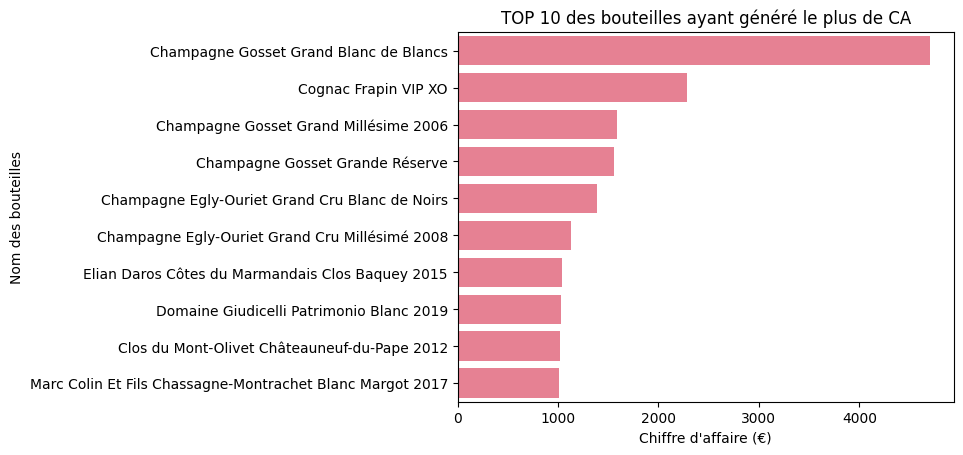

In [125]:
# Diagramme à barre pour présenter le TOP 10 des bouteilles les plus vendues le chiffre d'affaire par Nom du produit
sns.set_palette("husl")
sns.barplot(x="ca_par_produit (€)", y="post_title", data=data_fusion.nlargest(10, 'ca_par_produit (€)'))
plt.xlabel("Chiffre d'affaire (€)")
plt.ylabel("Nom des bouteilles") # Personnalisation de l'axe des y
plt.title("TOP 10 des bouteilles ayant généré le plus de CA")
plt.show()

In [126]:
data_fusion['post_title'].dtype

dtype('O')

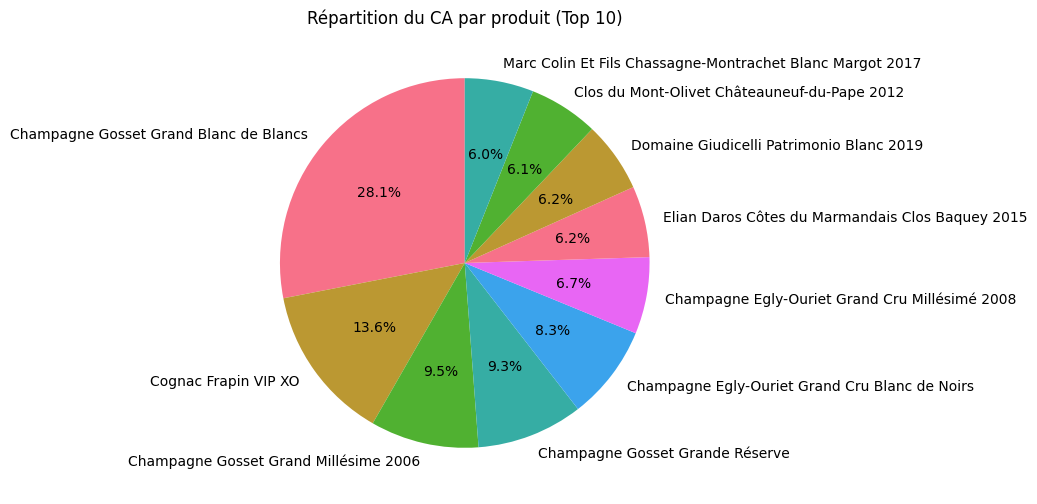

In [127]:
# Sélectionnez les 10 premiers produits par CA
produits_top = data_fusion.nlargest(10, 'ca_par_produit (€)')

# Créez le graphique en secteurs en utilisant les données de produits_top
plt.figure(figsize=(6, 6))
plt.pie(produits_top['ca_par_produit (€)'], labels=produits_top['post_title'], autopct='%1.1f%%', startangle=90)

# Ajoutez un titre
plt.title('Répartition du CA par produit (Top 10)')

# Affichez le graphique
plt.show()


# CHIFFRE D'AFFAIRE TOTAL

In [128]:
ca_total_web = data_fusion['ca_par_produit (€)'].sum()

print(f'Le chiffre d\'affaire total réalisé en ligne s\'élève à {ca_total_web} €.')

Le chiffre d'affaire total réalisé en ligne s'élève à 65652.6 €.


# EVOLUTION DU CHIFFRE D'AFFAIRE

In [129]:
# Regrouper par année et compter les lignes
comptage_par_annee = data_fusion.groupby(data_fusion["post_date"].dt.year).size()
comptage_par_annee

,0
post_date,
2018,507
2019,164
2020,43


In [130]:
# Regrouper par année et compter les lignes
comptage_par_annee = data_fusion.groupby(data_fusion["post_date"].dt.year).size()
comptage_par_annee

,0
post_date,
2018,507
2019,164
2020,43


In [131]:
# Regrouper par année et compter les lignes
comptage_par_annee_modified = data_fusion.groupby(data_fusion["post_modified"].dt.year).size()
comptage_par_annee_modified

,0
post_modified,
2018,7
2019,47
2020,660


In [132]:
# Utiliser groupby pour regrouper par année et mois
grouped = data_fusion.groupby([data_fusion["post_date"].dt.year, data_fusion["post_date"].dt.month])

# Calculer la somme du chiffre d'affaires pour chaque groupe
result = grouped["ca_par_produit (€)"].sum()

# Afficher le résultat
result

post_date  post_date
2018       2            21482.2
           3            10979.3
           4             9769.2
           5             6599.4
           6             1003.9
           7             1658.9
           9              613.9
           10            1535.8
           11             669.5
2019       1             1234.8
           2              994.2
           3             2673.9
           4             1423.4
           5              611.3
           6              597.2
           7             2786.6
           9               45.0
           10               0.0
           11               0.0
2020       1              770.3
           2               27.7
           3               46.2
           4              129.9
           5                0.0
           6                0.0
           7                0.0
Name: ca_par_produit (€), dtype: float64

In [133]:
# Extraire l'année de la colonne "post_date"
data_fusion["annee"] = data_fusion["post_date"].dt.year
data_fusion["mois"] = data_fusion["post_date"].dt.month
# Utiliser groupby pour regrouper par produit, année et mois, puis faire la somme du chiffre d'affaires
ca_mois_annee_produit = data_fusion.groupby(["post_title", "annee", "mois"])["ca_par_produit (€)"].sum().reset_index()

# Afficher le résultat
ca_mois_annee_produit

<ipython-input-133-9a33e21615a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fusion["annee"] = data_fusion["post_date"].dt.year
<ipython-input-133-9a33e21615a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fusion["mois"] = data_fusion["post_date"].dt.month


,post_title,annee,mois,ca_par_produit (€)
0,Agnès Levet Côte Rôtie Améthyste 2017,2019,3,164.8
1,Agnès Levet Côte Rôtie Maestria 2017,2019,3,165.0
2,Agnès Levet Côte Rôtie Péroline 2017,2019,3,171.0
3,Alain Graillot Crozes-Hermitage Blanc 2018,2018,5,244.0
4,Alain Graillot Crozes-Hermitage Rouge 2017,2018,5,146.4
...,...,...,...,...
709,Zind-Humbrecht Pinot Gris Roche Calcaire 2017,2018,2,0.0
710,Zind-Humbrecht Riesling Clos Windsbuhl 2014,2019,4,0.0
711,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,2018,2,0.0
712,Zind-Humbrecht Riesling Herrenweg de Turckheim...,2018,2,63.4


<ipython-input-134-4d96150b3691>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.lineplot(x="mois", y="ca_par_produit (€)", hue="annee", data=ca_mois_annee_produit, ci=None)


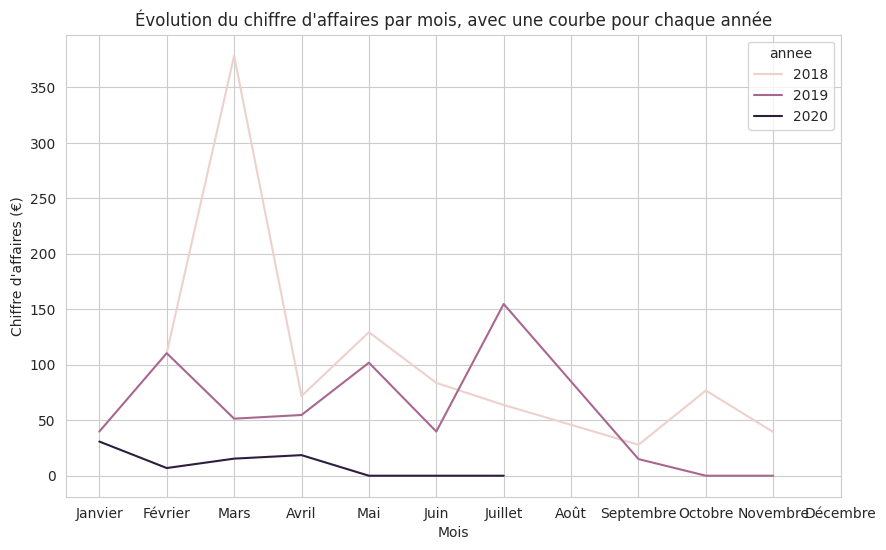

In [134]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("bright")
plot = sns.lineplot(x="mois", y="ca_par_produit (€)", hue="annee", data=ca_mois_annee_produit, ci=None)

plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Évolution du chiffre d'affaires par mois, avec une courbe pour chaque année")
# Personnaliser l'axe des x avec les mois de 1 à 12
mois_labels = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]
plt.xticks(range(1, 13), mois_labels)

plt.show()

# On peut dire que nos données sur les CA commence de février 2018 jusqu'à Juillet 2020.


# Pour comprendre s'il y a des incohérences sur les prix des produits en vente. On va réaliser une analyse exploratoire de la variable Prix.

# DISTRIBUTION DES PRIX

Représentation graphique en Histogramme pour comprendre la distribution des prix dans notre jeux de données.

In [135]:
data_fusion.describe()

,id,post_date,post_modified,stock_quantity,price,total_sales,ca_par_produit (€),%_ca_produit_par_rapport_total,annee,mois
count,714.000000,714,714,714.000000,714.000000,714.000000,714.000000,714.000000,714.00000,714.000000
mean,456.390756,2018-08-21 14:23:11.596638720,2020-06-20 08:06:03.025210112,28.761905,32.493137,3.816527,91.950420,0.140056,2018.35014,3.963585
min,86.000000,2018-02-08 00:00:00,2018-02-20 00:00:00,-1.000000,5.200000,0.000000,0.000000,0.000000,2018.00000,1.000000
25%,273.500000,2018-02-27 06:00:00,2020-06-18 06:00:00,2.000000,14.100000,0.000000,0.000000,0.000000,2018.00000,2.000000
50%,457.500000,2018-04-19 00:00:00,2020-08-04 00:00:00,12.000000,23.550000,1.000000,15.250000,0.023228,2018.00000,4.000000
75%,640.750000,2019-01-31 00:00:00,2020-08-25 00:00:00,35.000000,42.175000,4.000000,90.750000,0.138228,2019.00000,5.000000
max,819.000000,2020-07-20 00:00:00,2020-08-27 00:00:00,578.000000,225.000000,96.000000,4704.000000,7.164987,2020.00000,11.000000
std,212.889037,NaN,NaN,48.005486,27.810525,7.626536,263.017384,0.400620,0.59032,2.466907


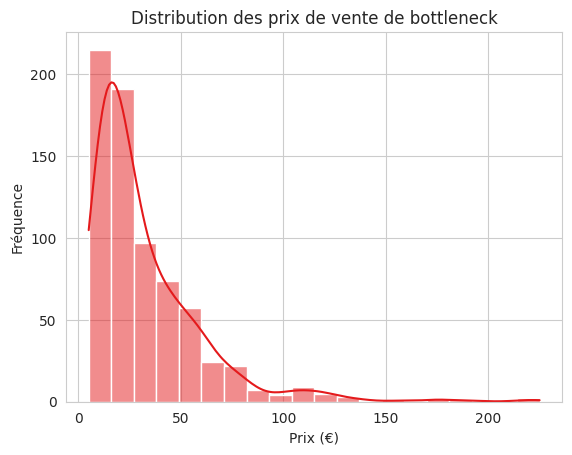

In [136]:
# Choisir un set de palette
sns.set_palette('Set1')
# Créer un histogramme en utilisant Seaborn
sns.histplot(data_fusion['price'], bins=20, kde=True)  #  "bins" est le nombre de bacs, "kde" pour le tracé de la densité

plt.title("Distribution des prix de vente de bottleneck")
plt.xlabel("Prix (€)")
plt.ylabel("Fréquence")
plt.show()

L'histogramme ci-dessus nous montre que la distribution de nos prix est asymétrique, les fréquences les plus importantes se retrouvent sur une plage de prix en dessous de 50 €. Cependant on observe qu'il y a plusieurs prix atypiques pouvant aller jusqu'à 200 € voir plus.

# Mesure de la tendance centrale
Ceci pour déterminer



In [137]:
prix_moyen = data_fusion['price'].mean()
prix_median =data_fusion['price'].median()
prix_mode = data_fusion['price'].mode()

print(f"Mode : {prix_mode}\nMoyenne : {prix_moyen:.2f}\nMédiane : {prix_median}")

Mode : 0    19.0
Name: price, dtype: float64
Moyenne : 32.49
Médiane : 23.55


**Le mode** de notre jeux de données nous indique que le prix de 19€ est le prix où on a le plus de vente.

**La moyenne** de **32,49€** est plus sensible aux valeurs aberrantes.

**La médiane** indique que la moitié de nos prix sont supérieur à **23.55**.

On remarque que **la moyenne** est supérieur à **la médiane**,cela peut indiquer que l'ensemble de données comporte des valeurs aberrantes très élevées qui font pencher la moyenne vers le haut.

# MESURES DE DISPERSION
Les objectifs de mesurer la dispersion :


*   Evaluer la variabilité : comprendre à quel point les données sont dispersés ou regroupés
*   Identifier les valeurs aberrantes : cela peut etee utile pour detecter des erreurs ou des données incohérentes.
*   Prévoir la fiabilité des estimations : Une faible dispersion suggère que les valeurs sont assez proches de la mesure de tendance centrale, ce qui peut renforcer la confiance. En revanche une grande dispersion peut indiquer une incertitude plus élevée dans les prédictions ou les estimations.

In [138]:
#MESURE DE DISPERSION

variance = data_fusion['price'].var(ddof=0)
ecart_type = data_fusion['price'].std(ddof=0)

prix_min = data_fusion['price'].min()
prix_max = data_fusion['price'].max()

print(f'Variance : {variance:.2f}\nEcart-type : {ecart_type:.2f}')
print(f'Les prix s\'étendent de : {prix_min} € à {prix_max} €.')

Variance : 772.34
Ecart-type : 27.79
Les prix s'étendent de : 5.2 € à 225.0 €.


La variance mesure la dispersion des données par rapport à leur moyenne.
Plus elle est élevée plus les valeurs individuelles sont dispersées et éloignées de la moyenne.

La variance est exprimée en unités au carré, ce qui la rend difficilement interprétable car elle n'est pas dans la même unité que nos données ce qui nous mène au calcul de l'écart-type racine carrée de la variance.

L'écart-type, ayant une valeur proche de la moyenne, permet de constater une nouvelle fois que les prix sont assez dispersés autour de cette dernière.


# IDENTIFICATION DES VALEURS ABERRANTES

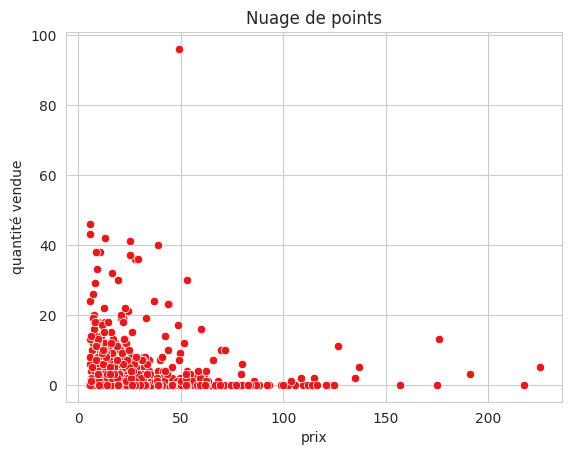

In [139]:
# Nuage de point : recherche d'une relation entre le prix et la quantité
sns.scatterplot(x='price', y='total_sales', data=data_fusion)
plt.title('Nuage de points')
plt.xlabel('prix')
plt.ylabel('quantité vendue')
plt.show()

# Le nuage de point montre visuellement, qu'il n'y a pas de coorélation entre le prix et la quantité. Ceci parce qu'il n'y a pas de tendance linéaire.

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-140-3b3519fe8e55>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()# Pour afficher la légende


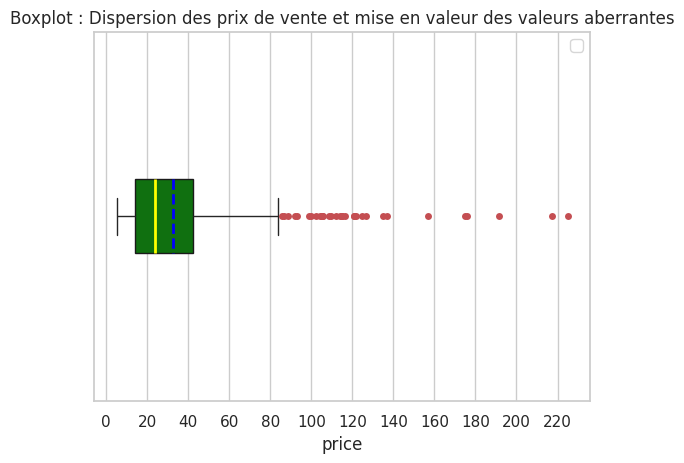

In [140]:
# Création d'une boite à moustache avec seaborn pour determiner les valeurs aberrantes

sns.set(style="whitegrid")

# Personnalisez l'axe x
plt.xticks(range(0, 300, 20))

# Personnalisez le titre du graphique
plt.title('Boxplot : Dispersion des prix de vente et mise en valeur des valeurs aberrantes')

# Personnalisez les outliers en rouge sans contour
#Utilisez showmeans pour afficher la moyenne à l'intérieur de la boîte
red_square = dict(markerfacecolor='r', marker='o', markeredgecolor='none')
sns.boxplot(x=data_fusion['price'], color='green',  width=0.2, orient='v', fliersize=5, boxprops=dict(edgecolor="k"), flierprops=red_square, showmeans=True, meanline=True,
            meanprops=dict(linestyle='--', linewidth=2, color='blue'),
            medianprops=dict(linestyle='-', linewidth=2, color='yellow'))

# Affiche le graphique
plt.legend()# Pour afficher la légende
plt.show()

**La Boîte centrale** représente le deuxième quartile (ou médian)des données. C'est la valeur médiane de l'ensemble des données. La longueur de la boîte indique la variabilité des données dans la moitié médiane de la distribution. Plus la boîte est longue, plus la dispersion des données est grande.

**La ligne médiane** à l'intérieur de la boîte représente la médiane des données. C'est la valeur qui divise les données en deux moitiés égales, ce qui signifie que 50 % des données se situent au-dessus de 23€ et 50 % en dessous de cette ligne et donc de cette valeur.

**Moustaches (Whiskers) :** Les moustaches sont des lignes qui s'étendent à partir de la boîte. Elles représentent la plage de données, excluant les valeurs aberrantes (outliers). Elles s'étendent généralement jusqu'au minimum et au maximum des données (ici entre 5 et 85) qui ne sont pas considérées comme des valeurs aberrantes.

**Outliers (Données aberrantes) :** Les points situés en dehors des moustaches sont représentés en tant qu'outliers. Ce sont des valeurs qui sont considérées comme des exceptions par rapport au reste des données. Ils sont présentées ici en rouge et qui sont significativement plus élevées que la plupart des autres données.

**Symétrie :** Un boxplot peut également nous donner une idée de la symétrie de la distribution des données. Si la médiane se trouve au centre de la boîte et que les moustaches sont d'égale longueur de part et d'autre, la distribution est approximativement symétrique. Si la médiane est décalée vers le haut ou le bas dans la boîte, cela peut indiquer une asymétrie. Ici on a une DISTRIBUTION ASYMETRIQUE.

AFFICHAGE DES PRODUITS QUI SE SITUENT ENTRE LA BORNE MAXIMALE DE LA BOITE A MOUSTACHE ET LA VALEUR MAXIMALE DES DONNEES.

La borne maximale du boxplot se calcule de la manière suivante:

$max\_boxplot = 1,5 * IQR + Q_3$<br>
avec:<br>
$IQR = Q_3 - Q_1$<br>
$Q_1 = premier\ quartile$<br>
$Q_3 = troisième\ quartile$

In [141]:
# Calcul de la borne maximale
Q1, Q3 = data_fusion['price'].quantile(0.25), data_fusion['price'].quantile(0.75)
IQR = Q3 - Q1
max_boxplot = 1.5 * IQR + Q3

# Affichage des outliers avec les prix les plus élevés
outliers = data_fusion.loc[(data_fusion['price'] >= max_boxplot)]
outliers.head(10)

,id,post_title,post_date,post_modified,onsale_web,stock_quantity,stock_status,price,total_sales,ca_par_produit (€),%_ca_produit_par_rapport_total,annee,mois
97,98,Domaine des Comtes Lafon Volnay 1er Cru Champa...,2019-07-25,2020-07-04,True,7,instock,99.0,0,0.0,0.000000,2019,7
98,99,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2018-07-17,2020-06-23,True,10,instock,105.0,0,0.0,0.000000,2018,7
100,101,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,2018-02-13,2020-02-20,True,5,instock,88.4,0,0.0,0.000000,2018,2
123,124,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,2018-03-02,2020-08-13,True,2,instock,126.5,11,1391.5,2.119490,2018,3
131,132,Domaine des Comtes Lafon Volnay 1er Cru Champa...,2019-07-25,2019-11-04,True,4,instock,115.0,0,0.0,0.000000,2019,7
132,133,Domaine des Comtes Lafon Volnay 1er Cru Santen...,2018-07-17,2020-07-02,True,17,instock,105.0,0,0.0,0.000000,2018,7
133,134,Château de Meursault Puligny-Montrachet 1er Cr...,2018-04-12,2020-02-06,True,7,instock,109.6,0,0.0,0.000000,2018,4
191,192,Champagne Larmandier-Bernier Grand Cru Les Che...,2018-03-02,2019-12-23,True,0,outofstock,85.6,1,85.6,0.130383,2018,3
197,198,Champagne Agrapart &amp; Fils Minéral Extra Br...,2018-07-18,2020-05-11,True,2,instock,86.8,0,0.0,0.000000,2018,7
198,199,Champagne Agrapart &amp; Fils L'Avizoise Extra...,2018-07-18,2020-07-09,True,0,outofstock,112.0,0,0.0,0.000000,2018,7


In [142]:
len(outliers)

32

Les prix qui correspondent aux valeurs les plus aberrantes concernent principalement des Champagne Egly-Ouriet Grand Cru Millésimé 2008 et David Duband Charmes-Chambertin Grand Cru 2014.
On retrouve également du 1er Cru, du Cognac ou encore du Whisky.
Après une comparaison avec les prix sur internet, il semble finalement que leurs prix soient bien plus élevés que le reste des autres produits mais, on ne peut pas les considérer comme des valeurs abérrantes.

/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


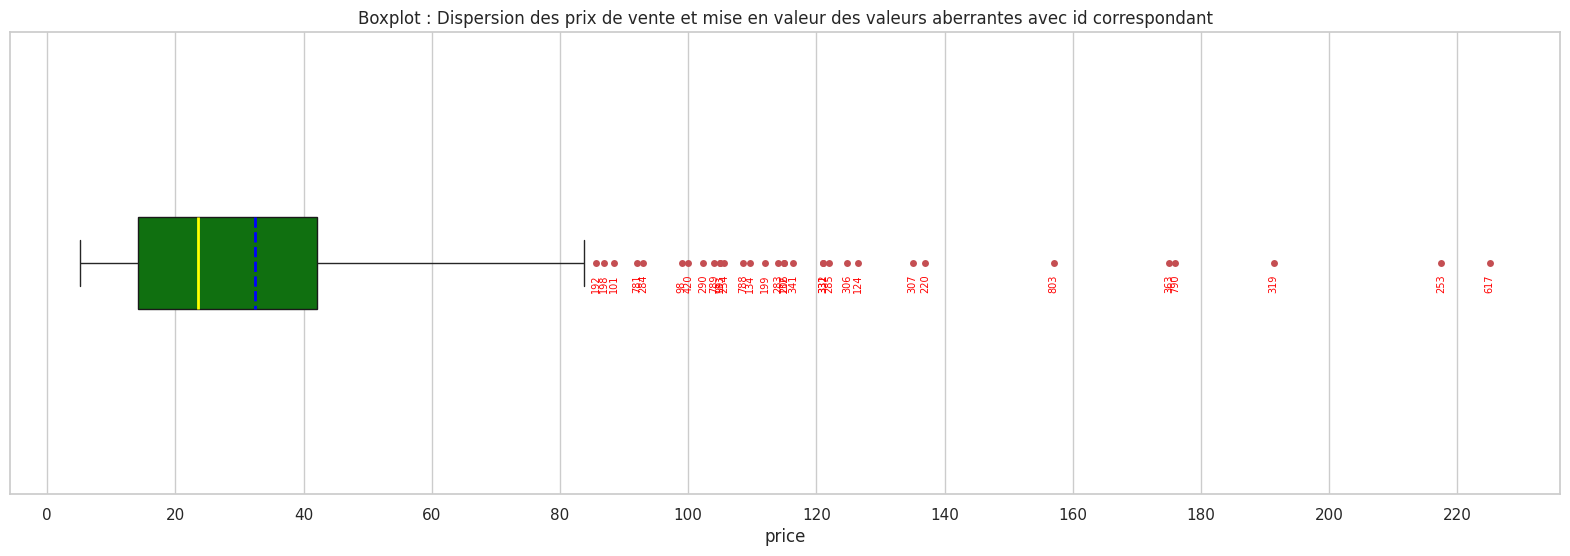

In [143]:
# Identifier les outliers avec les id

sns.set(style="whitegrid")

# Personnalisez l'axe x
plt.xticks(range(0, 300, 20))

# Personnalisez le titre du graphique
plt.title('Boxplot : Dispersion des prix de vente et mise en valeur des valeurs aberrantes avec id correspondant')

# Personnalisez les outliers en rouge sans contour
#Utilisez showmeans pour afficher la moyenne à l'intérieur de la boîte
red_square = dict(markerfacecolor='r', marker='o', markeredgecolor='none')
sns.boxplot(x=data_fusion['price'], color='green',  width=0.2, orient='v', fliersize=5, boxprops=dict(edgecolor="k"), flierprops=red_square, showmeans=True, meanline=True,
            meanprops=dict(linestyle='--', linewidth=2, color='blue'),
            medianprops=dict(linestyle='-', linewidth=2, color='yellow'))
# identifier les outliers
# Ajouter les ID des outliers au graphique avec Matplotlib
for _, row in outliers.iterrows():
    plt.annotate(row['id'], xy=(row['price'], 0), xytext=(0, -20), textcoords='offset points', ha='center', fontsize=7, color='red', rotation=90)

# Définir la taille de la figure
plt.gcf().set_size_inches(20, 6)
# Afficher le graphique
plt.show()


In [144]:
# Création dataframe hors outliers
data_hors_outliers = data_fusion[~data_fusion.isin(outliers.to_dict(orient='list')).all(1)]

# Réinitialisez les index du nouveau DataFrame
data_hors_outliers = data_hors_outliers.reset_index(drop=True)
data_hors_outliers

,id,post_title,post_date,post_modified,onsale_web,stock_quantity,stock_status,price,total_sales,ca_par_produit (€),%_ca_produit_par_rapport_total,annee,mois
0,86,Darnley's London Dry Gin Original,2019-04-04,2020-08-26,True,9,instock,36.0,0,0.0,0.000000,2019,4
1,87,Alphonse Mellot Sancerre Rouge Génération XIX ...,2018-04-13,2020-08-24,True,1,instock,67.5,0,0.0,0.000000,2018,4
2,88,Albert Mann Pinot Gris Vendanges Tardives Alte...,2018-04-17,2018-12-22,True,0,outofstock,44.0,0,0.0,0.000000,2018,4
3,89,Thierry Germain Saumur-Champigny Outre Terre 2013,2018-04-17,2020-08-05,True,3,instock,43.0,0,0.0,0.000000,2018,4
4,90,Alphonse Mellot Sancerre Rouge En Grands Champ...,2018-04-13,2020-01-31,True,5,instock,59.0,0,0.0,0.000000,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,815,Domaine Huet Vouvray Le Mont Moelleux Première...,2018-11-26,2020-05-09,True,9,instock,59.6,0,0.0,0.000000,2018,11
678,816,Champagne Larmandier-Bernier Latitude,2018-03-02,2018-12-28,True,0,outofstock,39.0,0,0.0,0.000000,2018,3
679,817,Wemyss Malts Blended Malt Scotch Whisky The Hi...,2018-03-22,2020-08-19,True,7,instock,62.0,0,0.0,0.000000,2018,3
680,818,Marcel Richaud Cairanne Rouge Les Estrambords ...,2018-05-17,2019-06-26,True,0,outofstock,25.7,4,102.8,0.156582,2018,5


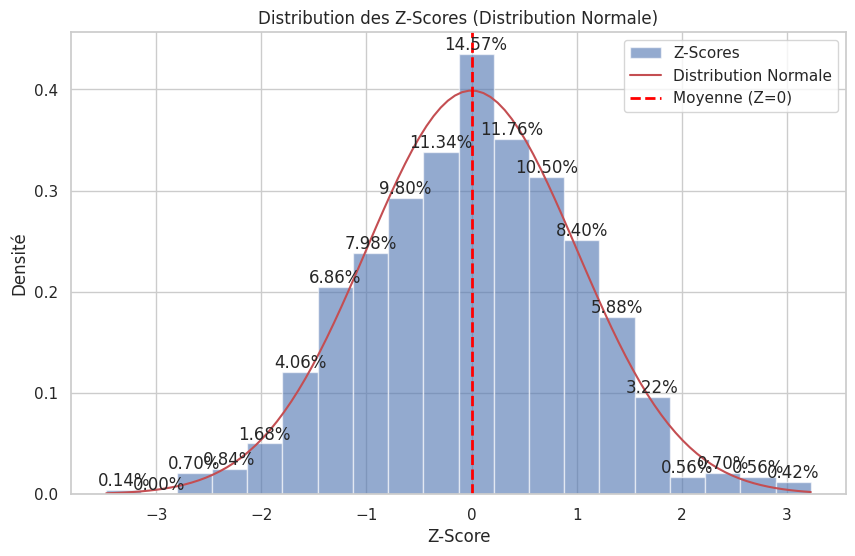

In [145]:
# Determination du z-scores

moy_price = data_fusion['price']
ecart_type = data_fusion['price']
prices = np.random.normal(moy_price, ecart_type)

# Calcul des z-scores pour chaque élément de l'échantillon
z_scores = (prices - moy_price) / ecart_type

# Créer un graphique de la distribution des z-scores
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(z_scores, density=True, alpha=0.6, color='b', label='Z-Scores', bins=20)
plt.title('Distribution des Z-Scores (Distribution Normale)')
plt.xlabel('Z-Score')
plt.ylabel('Densité')

# Calculer la distribution normale théorique
x = np.linspace(min(z_scores), max(z_scores), 100)
pdf = stats.norm.pdf(x, 0, 1)  # PDF de la distribution normale (moyenne 0, écart-type 1)

# Ajouter la courbe de la distribution normale théorique
plt.plot(x, pdf, 'r', label='Distribution Normale')

plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Moyenne (Z=0)')
plt.legend()

# Ajouter les pourcentages à l'intérieur de chaque barre
percentage_list = []
for i, patch in enumerate(patches):
    height = patch.get_height()
    percentage = height * (bins[i+1] - bins[i])
    percentage_list.append(percentage)
    plt.text(patch.get_x() + patch.get_width() / 2, height, f'{percentage:.2%}', ha='center', va='bottom')

plt.grid(True)
plt.show()

**Position par rapport à la moyenne :**

Un z-score de 0 signifie que la valeur est égale à la moyenne de la distribution.
Un z-score positif indique que la valeur est supérieure à la moyenne.
Un z-score négatif indique que la valeur est inférieure à la moyenne.
Écart par rapport à l'écart-type :

Plus le z-score est éloigné de zéro (positif ou négatif), plus la valeur est éloignée de la moyenne en termes d'écart-type. Par exemple, un z-score de 2 signifie que la valeur est à 2 écart-types au-dessus de la moyenne, tandis qu'un z-score de -2 signifie qu'elle est à 2 écart-types en dessous de la moyenne.

**Répartition des valeurs :** La densité des z-scores montre comment les valeurs sont réparties autour de la moyenne. Plus la densité est élevée à un endroit donné, plus il y a de valeurs à proximité avec des z-scores similaires.